In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


参考サイト:

* [深層学習を用いた時系列データにおける異常検知 | Kabuku Developers Blog](https://www.kabuku.co.jp/developers/time_series_anomaly_detect_deep_learning)
* [異常検知と変化検知の1～3章をまとめてみた](https://www.slideshare.net/ssuser9d1eb2/13-77738468)


# イベント1

In [0]:
!ls *.txt

cpu_user_time.txt    memory_available.txt  total_cache_miss.txt
free_disk_space.txt  total_cache_hits.txt  total_queries.txt


In [0]:
file_lists = ('cpu_user_time.txt', 'memory_available.txt', 'total_cache_miss.txt', 'free_disk_space.txt', 'total_cache_hits.txt', 'total_queries.txt')

In [0]:
file_contents = {}
for fname in file_lists:    
    with open(fname) as f:
        file_contents[fname] = f.readlines()

In [0]:
file_contents.keys()

dict_keys(['cpu_user_time.txt', 'memory_available.txt', 'total_cache_miss.txt', 'free_disk_space.txt', 'total_cache_hits.txt', 'total_queries.txt'])

In [0]:
num_of_query = file_contents.get("total_queries.txt")
len(num_of_query)

28322

In [0]:
'''
history_uint	itemid
history_uint	clock
history_uint	value
history_uint	ns
'''

'\nhistory_uint\titemid\nhistory_uint\tclock\nhistory_uint\tvalue\nhistory_uint\tns\n'

In [0]:
label = ('itemid', 'clock', 'value', 'ns')

In [0]:
import numpy as np

In [0]:
# tsv
total_queries = [list(map(int, line.replace('\n','').split('\t'))) for line in num_of_query]

# イベント2

In [0]:
!cp "/content/drive/My Drive/event2019/totalquery.csv" total_queries_iw.txt

In [0]:
!head  total_queries_iw.txt

35291,1574745195,4151,165533866
35291,1574745421,8572,956626843
35291,1574745481,1886,981691842
35291,1574745542,2081,22908957
35291,1574745601,2489,52232386
35291,1574745661,2897,129647773
35291,1574745721,2615,158483879
35291,1574745781,2546,186789258
35291,1574745841,2781,214697919
35291,1574745901,3714,280145656


In [0]:
with open("total_queries_iw.txt") as f:
    file_content_iw = f.readlines()

In [0]:
len(file_content_iw), file_content_iw[:2]

(4504,
 ['35291,1574745195,4151,165533866\n', '35291,1574745421,8572,956626843\n'])

In [0]:
# csv
total_queries_iw = [list(map(int, line.replace('\n','').split(','))) for line in file_content_iw]

In [0]:
len(total_queries_iw), total_queries_iw[2]

(4504, [35291, 1574745481, 1886, 981691842])

# データの整形

In [0]:
def conv_datetime(dat):
    """
    unixtime => datetime
    """
    from datetime import datetime, timedelta, timezone
    for tq in dat:
        # 時間のカラム
        timeint = tq[1]
        tq[1] = datetime.fromtimestamp(timeint) + timedelta(hours=9)
    return dat

In [0]:
# datetimeへ変換
total_queries1 = conv_datetime(total_queries)
total_queries1_iw = conv_datetime(total_queries_iw)

In [0]:
# 日付,QPSだけ抽出
total_queries2 = np.array(total_queries1)[:,[1,2]]
total_queries2_iw = np.array(total_queries1_iw)[:,[1,2]]

In [0]:
import pandas as pd
pf = pd.DataFrame(total_queries2)
pf.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,28282,28283,28284,28285,28286,28287,28288,28289,28290,28291,28292,28293,28294,28295,28296,28297,28298,28299,28300,28301,28302,28303,28304,28305,28306,28307,28308,28309,28310,28311,28312,28313,28314,28315,28316,28317,28318,28319,28320,28321
0,2019-10-26 20:42:12,2019-10-26 20:43:18,2019-10-26 20:44:01,2019-10-26 20:45:01,2019-10-26 20:46:01,2019-10-26 20:47:01,2019-10-26 20:48:01,2019-10-26 20:49:01,2019-10-26 20:50:01,2019-10-26 20:51:01,2019-10-26 20:52:01,2019-10-26 20:53:01,2019-10-26 20:54:01,2019-10-26 20:55:02,2019-10-26 20:56:01,2019-10-26 20:57:01,2019-10-26 20:58:01,2019-10-26 20:59:01,2019-10-26 21:00:01,2019-10-26 21:01:01,2019-10-26 21:02:01,2019-10-26 21:03:02,2019-10-26 21:04:01,2019-10-26 21:05:01,2019-10-26 21:06:01,2019-10-26 21:07:01,2019-10-26 21:08:01,2019-10-26 21:09:01,2019-10-26 21:10:01,2019-10-26 21:11:02,2019-10-26 21:12:01,2019-10-26 21:13:01,2019-10-26 21:14:01,2019-10-26 21:15:01,2019-10-26 21:16:01,2019-10-26 21:17:01,2019-10-26 21:18:01,2019-10-26 21:19:02,2019-10-26 21:20:01,2019-10-26 21:21:01,...,2019-11-15 13:48:01,2019-11-15 13:49:01,2019-11-15 13:50:01,2019-11-15 13:51:01,2019-11-15 13:52:01,2019-11-15 13:53:01,2019-11-15 13:54:01,2019-11-15 13:55:01,2019-11-15 13:56:01,2019-11-15 13:57:02,2019-11-15 13:58:01,2019-11-15 13:59:01,2019-11-15 14:00:01,2019-11-15 14:01:01,2019-11-15 14:02:01,2019-11-15 14:03:01,2019-11-15 14:04:01,2019-11-15 14:05:01,2019-11-15 14:06:01,2019-11-15 14:07:02,2019-11-15 14:08:01,2019-11-15 14:09:01,2019-11-15 14:10:01,2019-11-15 14:11:01,2019-11-15 14:12:01,2019-11-15 14:13:01,2019-11-15 14:14:01,2019-11-15 14:15:01,2019-11-15 14:16:01,2019-11-15 14:17:02,2019-11-15 14:18:01,2019-11-15 14:19:01,2019-11-15 14:20:01,2019-11-15 14:21:01,2019-11-15 14:22:01,2019-11-15 14:23:01,2019-11-15 14:24:01,2019-11-15 14:25:01,2019-11-15 14:26:01,2019-11-15 14:27:02
1,103,51,22,29,25,20,60,26,20,19,37,26,38,29,21,16,26,44,26,22,22,29,47,24,31,18,28,27,17,46,23,33,32,34,51,50,24,29,34,24,...,8,6,6,8,6,8,6,8,6,6,8,6,8,8,8,10,6,6,10,6,6,10,8,7,14,8,7,8,8,6,21,47,14,29,38,22,8,20,13,9


In [0]:
import pandas as pd
pf = pd.DataFrame(total_queries2_iw)
pf.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4464,4465,4466,4467,4468,4469,4470,4471,4472,4473,4474,4475,4476,4477,4478,4479,4480,4481,4482,4483,4484,4485,4486,4487,4488,4489,4490,4491,4492,4493,4494,4495,4496,4497,4498,4499,4500,4501,4502,4503
0,2019-11-26 14:13:15,2019-11-26 14:17:01,2019-11-26 14:18:01,2019-11-26 14:19:02,2019-11-26 14:20:01,2019-11-26 14:21:01,2019-11-26 14:22:01,2019-11-26 14:23:01,2019-11-26 14:24:01,2019-11-26 14:25:01,2019-11-26 14:26:01,2019-11-26 14:27:01,2019-11-26 14:28:01,2019-11-26 14:29:01,2019-11-26 14:30:01,2019-11-26 14:31:01,2019-11-26 14:32:01,2019-11-26 14:33:01,2019-11-26 14:34:01,2019-11-26 14:35:01,2019-11-26 14:36:01,2019-11-26 14:37:01,2019-11-26 14:38:01,2019-11-26 14:39:01,2019-11-26 14:40:01,2019-11-26 14:41:01,2019-11-26 14:42:01,2019-11-26 14:43:01,2019-11-26 14:44:01,2019-11-26 14:45:01,2019-11-26 14:46:01,2019-11-26 14:47:01,2019-11-26 14:48:02,2019-11-26 14:49:01,2019-11-26 14:50:01,2019-11-26 14:51:01,2019-11-26 14:52:01,2019-11-26 14:53:01,2019-11-26 14:54:01,2019-11-26 14:55:01,...,2019-11-29 16:40:01,2019-11-29 16:41:01,2019-11-29 16:42:01,2019-11-29 16:43:01,2019-11-29 16:44:01,2019-11-29 16:45:01,2019-11-29 16:46:01,2019-11-29 16:47:01,2019-11-29 16:48:01,2019-11-29 16:49:01,2019-11-29 16:50:01,2019-11-29 16:51:01,2019-11-29 16:52:01,2019-11-29 16:53:01,2019-11-29 16:54:01,2019-11-29 16:55:01,2019-11-29 16:56:01,2019-11-29 16:57:01,2019-11-29 16:58:01,2019-11-29 16:59:01,2019-11-29 17:00:01,2019-11-29 17:01:01,2019-11-29 17:02:01,2019-11-29 17:03:01,2019-11-29 17:04:01,2019-11-29 17:05:01,2019-11-29 17:06:01,2019-11-29 17:07:01,2019-11-29 17:08:01,2019-11-29 17:09:01,2019-11-29 17:10:01,2019-11-29 17:11:01,2019-11-29 17:12:01,2019-11-29 17:13:01,2019-11-29 17:14:01,2019-11-29 17:15:01,2019-11-29 17:16:01,2019-11-29 17:17:01,2019-11-29 17:18:02,2019-11-29 17:19:01
1,4151,8572,1886,2081,2489,2897,2615,2546,2781,3714,3811,3216,4088,3877,3313,3205,2030,2270,2313,2804,1944,2311,2773,2639,2738,2262,2489,2184,2236,2076,1941,1955,2978,1965,1644,2325,1893,1658,2208,2457,...,3707,2356,2632,2256,2508,2865,2177,2291,2060,1689,2462,1759,2347,3910,3953,3980,3979,2831,3121,3160,3245,4272,3963,4938,4096,4670,4241,3865,3944,2933,2284,2727,5215,2970,3310,2877,2339,2892,4174,3918


# データ分割（日毎），可視化

In [0]:
'''
描画する関数
'''
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import drange
import datetime

def visualize(dat, begin_dt, end_dt):
    fig, ax = plt.subplots(1, 1, figsize=(20, 4))

    ax.plot(dat[:,0], dat[:,1])
    xfmt = mdates.DateFormatter("%H:%M")
    # xloc = mdates.DayLocator()
    xloc = mdates.HourLocator()

    ax.xaxis.set_major_locator(xloc)
    ax.xaxis.set_major_formatter(xfmt)

    fig = plt.figure(figsize=(8.0, 6.0))

    # x軸の範囲
    ax.set_xlim(begin_dt, end_dt) 
    ax.grid(True)


def visualize2(x_axis, label, label_color, y_dat, begin_at, end_at):
    fig, ax = plt.subplots(1, 1, figsize=(30, 6))
    assert len(x_axis) == len(y_dat[0]), "Invalid dimensions!"
    for y,l,c in zip(y_dat, label, label_color):
        ax.plot(x_axis, y, color=c, label=l)
    xfmt = mdates.DateFormatter("%m/%d %H:%M")
    # xloc = mdates.DayLocator()
    xloc = mdates.HourLocator()

    ax.xaxis.set_major_locator(xloc)
    ax.xaxis.set_major_formatter(xfmt)

    fig = plt.figure(figsize=(8.0, 6.0))

    # x軸の範囲
    ax.set_xlim(begin_at, end_at)
    ax.grid(True)
    ax.legend(loc='upper left')

In [0]:
import datetime as dt

def pickup_dat_by_day(begin_dt, end_dt, dat):
    """
    日毎にデータを分割
    """
    tmp = dat[begin_dt < dat[:,0]]
    return tmp[tmp[:,0] < end_dt]

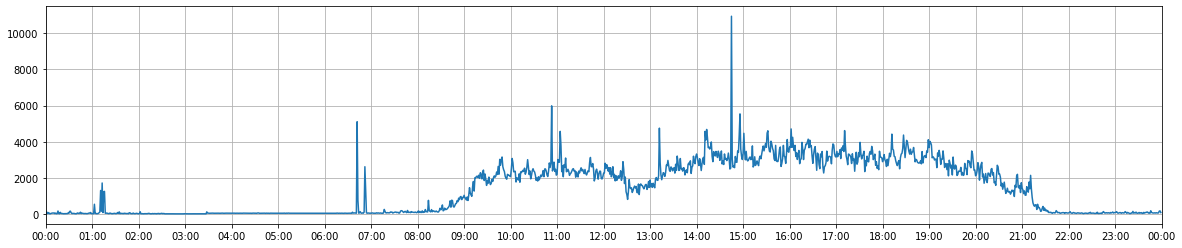

<Figure size 576x432 with 0 Axes>

In [0]:
# 分割・可視化
dat_1029_org = pickup_dat_by_day(dt.datetime(2019, 10, 29), dt.datetime(2019, 10, 30), total_queries2)
visualize(dat_1029_org, dt.datetime(2019, 10, 29), dt.datetime(2019, 10, 30))

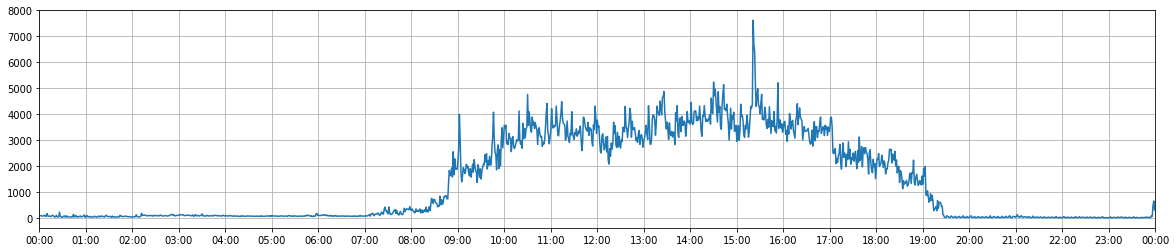

<Figure size 576x432 with 0 Axes>

In [0]:
# 分割・可視化
dat_1030_org = pickup_dat_by_day(dt.datetime(2019, 10, 30), dt.datetime(2019, 10, 31), total_queries2)
visualize(dat_1030_org, dt.datetime(2019, 10, 30), dt.datetime(2019, 10, 31))

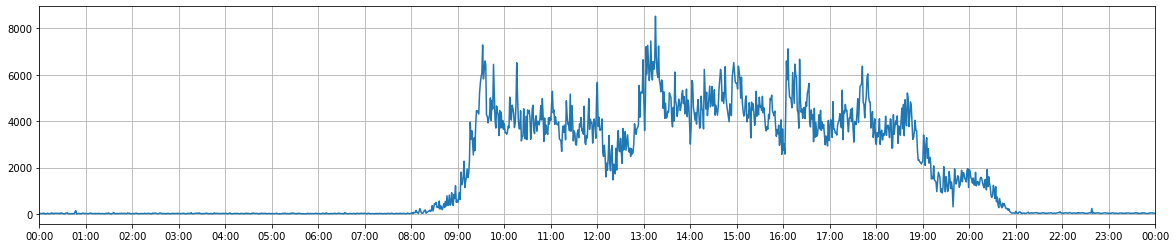

<Figure size 576x432 with 0 Axes>

In [0]:
# 分割・可視化
dat_1127_org = pickup_dat_by_day(dt.datetime(2019, 11, 27), dt.datetime(2019, 11, 28), total_queries2_iw)
visualize(dat_1127_org, dt.datetime(2019, 11, 27), dt.datetime(2019, 11, 28))

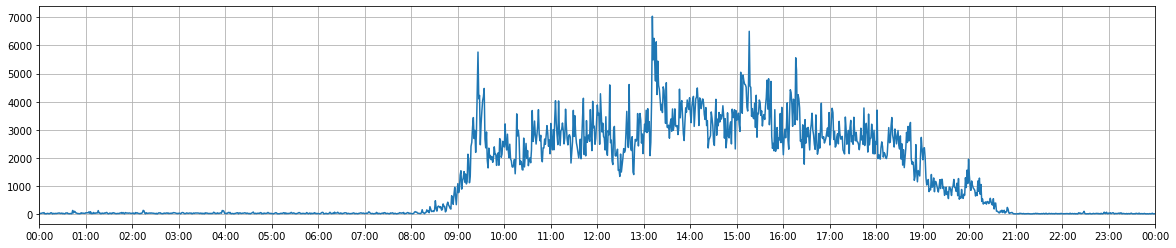

<Figure size 576x432 with 0 Axes>

In [0]:
# 分割・可視化
dat_1128_org = pickup_dat_by_day(dt.datetime(2019, 11, 28), dt.datetime(2019, 11, 29), total_queries2_iw)
visualize(dat_1128_org, dt.datetime(2019, 11, 28), dt.datetime(2019, 11, 29))

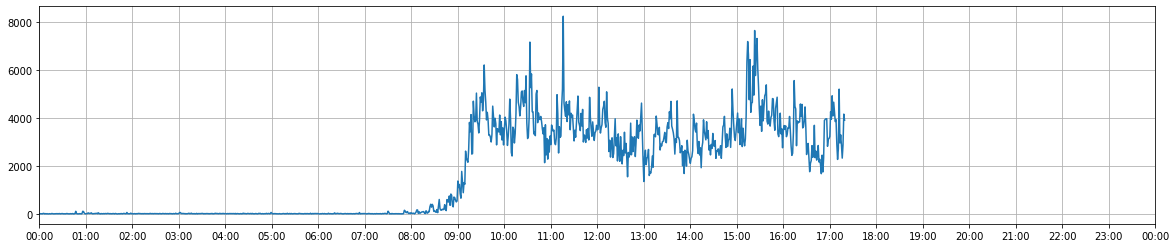

<Figure size 576x432 with 0 Axes>

In [0]:
# 分割・可視化
dat_1129_org = pickup_dat_by_day(dt.datetime(2019, 11, 29), dt.datetime(2019, 11, 30), total_queries2_iw)
visualize(dat_1129_org, dt.datetime(2019, 11, 29), dt.datetime(2019, 11, 30))

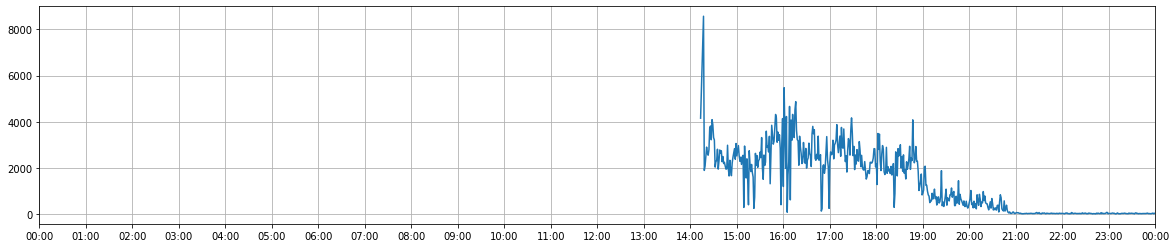

<Figure size 576x432 with 0 Axes>

In [0]:
# 分割・可視化
dat_1126_org = pickup_dat_by_day(dt.datetime(2019, 11, 26), dt.datetime(2019, 11, 27), total_queries2_iw)
visualize(dat_1126_org, dt.datetime(2019, 11, 26), dt.datetime(2019, 11, 27))

In [0]:
# 日付のリスト
dat_1029_day = dat_1029_org[:,0]
dat_1029_day, dat_1029_day.shape

(array([datetime.datetime(2019, 10, 29, 0, 0, 1),
        datetime.datetime(2019, 10, 29, 0, 1, 1),
        datetime.datetime(2019, 10, 29, 0, 2, 1), ...,
        datetime.datetime(2019, 10, 29, 23, 57, 1),
        datetime.datetime(2019, 10, 29, 23, 58, 1),
        datetime.datetime(2019, 10, 29, 23, 59, 2)], dtype=object), (1440,))

In [0]:
# 日付のリスト
dat_1030_day = dat_1030_org[:,0]
dat_1127_day = dat_1127_org[:,0]
dat_1128_day = dat_1128_org[:,0]

In [0]:
# 全体の件数
len(dat_1029_org) + len(dat_1030_org) + len(dat_1126_org) + len(dat_1127_org) + len(dat_1128_org) + len(dat_1129_org)  

7384

# 標準化，可視化

In [0]:
def standardize(dat, do_fit = False):
    """
    標準化（未使用）
    """
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    if do_fit:
        sc.fit(dat)
    return sc.transform(dat)

# formated_dat = standardize(total_queries2[:,1].reshape(-1, 1))

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

(1440, 2)

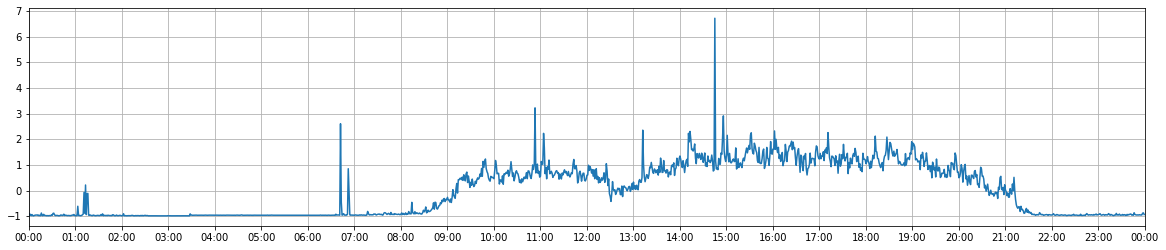

<Figure size 576x432 with 0 Axes>

In [0]:
# 10/29の標準化後（訓練）
dat_1029_org[:,1] = sc.fit_transform(dat_1029_org[:,1].reshape(-1, 1)).T
visualize(dat_1029_org, dt.datetime(2019, 10, 29), dt.datetime(2019, 10, 30))
dat_1029_org.shape

(1440, 2)

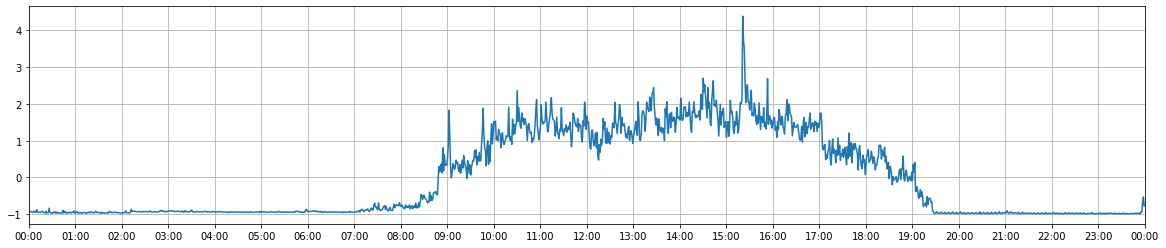

<Figure size 576x432 with 0 Axes>

In [0]:
# 10/30の標準化後（検証）
dat_1030_org[:,1] = sc.transform(dat_1030_org[:,1].reshape(-1, 1)).T
visualize(dat_1030_org, dt.datetime(2019, 10, 30), dt.datetime(2019, 10, 31))
dat_1030_org.shape

(1440, 2)

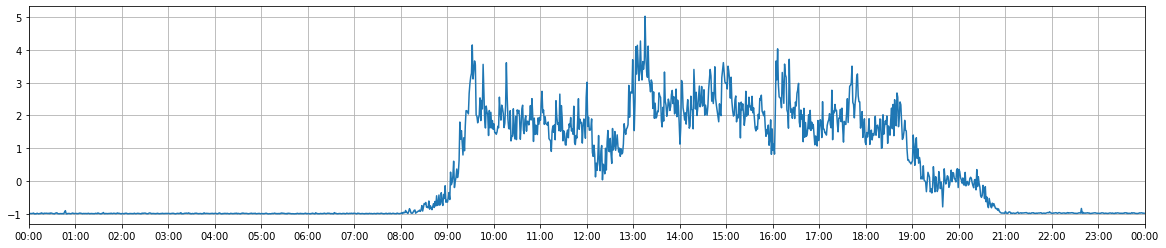

<Figure size 576x432 with 0 Axes>

In [0]:
# 11/27の標準化後（テスト）
dat_1127_org[:,1] = sc.transform(dat_1127_org[:,1].reshape(-1, 1)).T
visualize(dat_1127_org, dt.datetime(2019, 11, 27), dt.datetime(2019, 11, 28))
dat_1127_org.shape

(1440, 2)

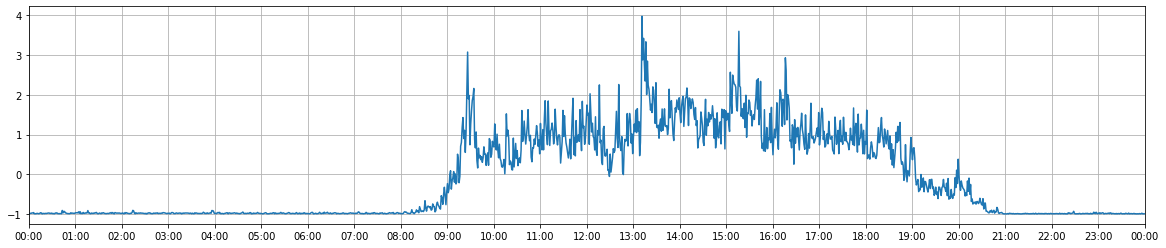

<Figure size 576x432 with 0 Axes>

In [0]:
# 11/28の標準化後（テスト）
dat_1128_org[:,1] = sc.transform(dat_1128_org[:,1].reshape(-1, 1)).T
visualize(dat_1128_org, dt.datetime(2019, 11, 28), dt.datetime(2019, 11, 29))
dat_1128_org.shape

In [0]:
# データのリスト
dat_1029_body = dat_1029_org[:,1]
dat_1030_body = dat_1030_org[:,1]
dat_1127_body = dat_1127_org[:,1]
dat_1128_body = dat_1128_org[:,1]

# データ分割（バッチサイズ）

In [0]:
# バッチサイズ
TIME_STEPS = 32

In [0]:
'''
データ分割（バッチサイズの調整）
'''
from more_itertools import chunked
import numpy as np

def split_dat(time_steps: int, data):
    dataX = []
    for i in range(0, len(data) - time_steps + 1, time_steps):
        tmp = data[i:(i + time_steps)]
        x = np.split(tmp, time_steps)
        dataX.append(x)
    return np.array(dataX)

In [0]:
# データの分割
split_tmp = split_dat(time_steps=TIME_STEPS, data=dat_1029_org)
# split_tmp.shape

# データを整形
# 構造: [ [日付,値], [日付,値], [日付,値] ]
dat_1029_split = split_tmp[:,:,:,1]
dat_1029_split_day = split_tmp[:,:,:,0]

dat_1029_split.shape

(45, 32, 1)

In [0]:
# データの分割
split_tmp = split_dat(time_steps=TIME_STEPS, data=dat_1030_org)
# split_tmp.shape

# データを整形
# 構造: [ [日付,値], [日付,値], [日付,値] ]
dat_1030_split = split_tmp[:,:,:,1]  # 値だけの配列
dat_1030_split.shape

(45, 32, 1)

In [0]:
# データの分割
split_tmp = split_dat(time_steps=TIME_STEPS, data=dat_1127_org)
# split_tmp.shape

# データを整形
# 構造: [ [日付,値], [日付,値], [日付,値] ]
dat_1127_split = split_tmp[:,:,:,1]  # 値だけの配列
dat_1127_split.shape

(45, 32, 1)

In [0]:
# データの分割
split_tmp = split_dat(time_steps=TIME_STEPS, data=dat_1128_org)
# split_tmp.shape

# データを整形
# 構造: [ [日付,値], [日付,値], [日付,値] ]
dat_1128_split = split_tmp[:,:,:,1]  # 値だけの配列
# dat_1128_split.shape
dat_1128_split_day = split_tmp[:,:,:,0]  # 日付だけの配列

# モデルの作成と学習

In [0]:
# from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Input
import keras as ks
ks.__version__

'2.2.5'

In [0]:
'''
モデルの作成
'''
def create_model(input_dim,
                 time_steps,
                 latent_dim,
                 # データが一つしかないので1しか選べない
                 batch_size=1,
                 optimizer='adam'
                 ):
    # 入力の受け取り(次元数を指定)
    x = Input(shape=(time_steps, input_dim,))

    # LSTMを使う
    h = LSTM(latent_dim, stateful=False, return_sequences=True)(x)

    # 通常の全結合ニューラルネットワークレイヤー．
    out = Dense(input_dim)(h)

    # モデル定義
    # Sequential() を使うほうがいい???
    # https://keras.io/ja/getting-started/sequential-model-guide/
    model = Model(x, out)
    model.summary()
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mse'])

    return model

model = create_model(input_dim=dat_1029_split.shape[-1], # 入力の次元数
                     time_steps=dat_1029_split.shape[1], # 分割数
                     latent_dim=200, # 出力の次元数
                     batch_size=TIME_STEPS
                     )

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 1)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 32, 200)           161600    
_________________________________________________________________
dense_2 (Dense)              (None, 32, 1)             201       
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [0]:
fit = model.fit(dat_1029_split, dat_1029_split, epochs=200, validation_data=(dat_1030_split, dat_1030_split))

Train on 45 samples, validate on 45 samples
Epoch 1/200
45/45 [==============================] - 1s 23ms/step - loss: 0.9283 - mean_squared_error: 0.9283 - val_loss: 0.7913 - val_mean_squared_error: 0.7913
Epoch 2/200
45/45 [==============================] - 0s 3ms/step - loss: 0.6041 - mean_squared_error: 0.6041 - val_loss: 0.4178 - val_mean_squared_error: 0.4178
Epoch 3/200
45/45 [==============================] - 0s 3ms/step - loss: 0.3271 - mean_squared_error: 0.3271 - val_loss: 0.2158 - val_mean_squared_error: 0.2158
Epoch 4/200
45/45 [==============================] - 0s 3ms/step - loss: 0.2392 - mean_squared_error: 0.2392 - val_loss: 0.2417 - val_mean_squared_error: 0.2417
Epoch 5/200
45/45 [==============================] - 0s 3ms/step - loss: 0.2335 - mean_squared_error: 0.2335 - val_loss: 0.1670 - val_mean_squared_error: 0.1670
Epoch 6/200
45/45 [==============================] - 0s 3ms/step - loss: 0.1780 - mean_squared_error: 0.1780 - val_loss: 0.1641 - val_mean_squared_err

In [0]:
score = model.evaluate(dat_1127_split, dat_1127_split, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.006234382920795017
Test accuracy: 0.006234384576479594


In [0]:
'''
描画する関数
'''
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import drange
import datetime

def plot_history_loss(fit):
    fig, ax = plt.subplots(1, 1, figsize=(20, 4))

    # Plot the loss in the history
    ax.plot(fit.history['loss'],label="loss for training")
    ax.plot(fit.history['val_loss'],label="loss for validation")
    ax.set_title('model loss')
    ax.set_xlabel('epoch')
    ax.set_ylabel('loss')
    ax.legend(loc='upper right')
    ax.grid(True)
    fig = plt.figure(figsize=(8.0, 6.0))
    

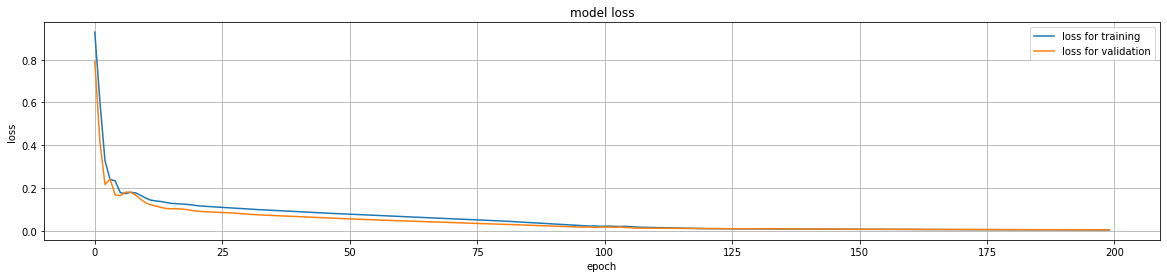

<Figure size 576x432 with 0 Axes>

In [0]:
plot_history_loss(fit)

# 学習(train:10/29)データの予測

In [0]:
def predict_model(day, x, model):
    prepare_value = x.copy()
    preds = model.predict(prepare_value)
    return preds

In [0]:
# 引数の順序：軸, 値, モデル
pred = predict_model(dat_1029_day, dat_1029_split, model)
pred.shape

(45, 32, 1)

In [0]:
# データを整形
pred_1d = pred.reshape(-1, 1)[:,0]
pred_1d, pred_1d.shape

(array([-0.56495935, -0.9254011 , -1.0061082 , ..., -0.884838  ,
        -0.8739832 , -0.9328727 ], dtype=float32), (1440,))

In [0]:
# 結果の可視化
dat_1029_day, dat_1029_day.shape

(array([datetime.datetime(2019, 10, 29, 0, 0, 1),
        datetime.datetime(2019, 10, 29, 0, 1, 1),
        datetime.datetime(2019, 10, 29, 0, 2, 1), ...,
        datetime.datetime(2019, 10, 29, 23, 57, 1),
        datetime.datetime(2019, 10, 29, 23, 58, 1),
        datetime.datetime(2019, 10, 29, 23, 59, 2)], dtype=object), (1440,))

In [0]:
# 日付と値を結合
# dat_1029_day.shape, pred_1d.shape
dat_graph = np.stack([dat_1029_day, pred_1d], 1)

In [0]:
# MAXとMINを計算
MAX_1029, MIN_1029 = np.max(pred_1d), np.min(pred_1d)
MAX_1029, MIN_1029

(6.731777, -1.057036)

In [0]:
max_1029 = np.array([MAX_1029 for _ in dat_1029_day])
min_1029 = np.array([MIN_1029 for _ in dat_1029_day])

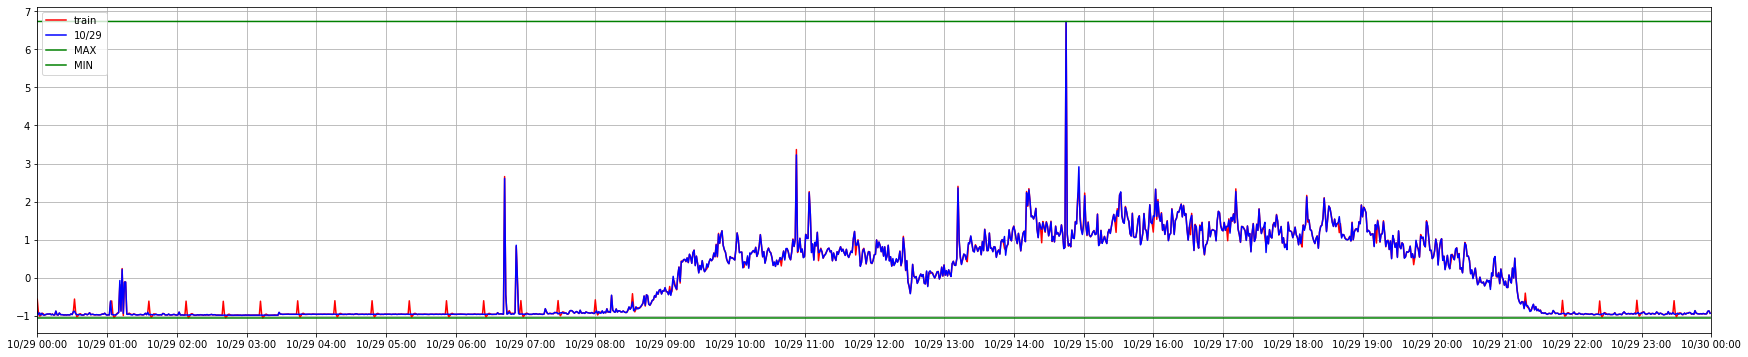

<Figure size 576x432 with 0 Axes>

In [0]:
# visualize2(dat_1030_day, ["10/29", "10/30"], ["red", "blue"], [pred_1d, dat_1030_body], dt.datetime(2019, 10, 30, 10, 00, 00), dt.datetime(2019, 10, 30, 12, 00, 00))
visualize2(dat_1029_day, ["train", "10/29", "MAX", "MIN"], ["red", "blue", "green", "green"], [pred_1d, dat_1029_body, max_1029, min_1029], dt.datetime(2019, 10, 29), dt.datetime(2019, 10, 30))

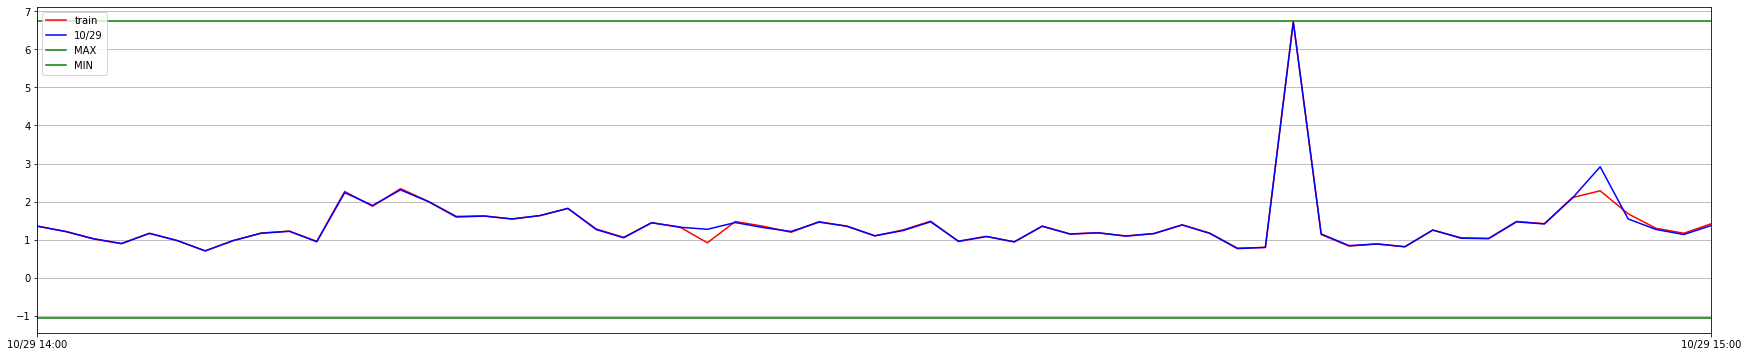

<Figure size 576x432 with 0 Axes>

In [0]:
visualize2(dat_1029_day, ["train", "10/29", "MAX", "MIN"], ["red", "blue", "green", "green"], [pred_1d, dat_1029_body, max_1029, min_1029], dt.datetime(2019, 10, 29, 14, 00), dt.datetime(2019, 10, 29, 15, 00))

In [0]:
# 実データで予測値Maxより大きいもの
dat_graph[dat_1029_body > max_1029]

array([], shape=(0, 2), dtype=object)

In [0]:
# 実データで予測値Minより小さいもの
dat_graph[dat_1029_body < min_1029]

array([], shape=(0, 2), dtype=object)

# 訓練(valid:10/30)データの予測

In [0]:
# 引数の順序：軸, 値, モデル
pred = predict_model(dat_1030_day, dat_1030_split, model)
pred.shape

(45, 32, 1)

In [0]:
# データを整形
pred_1d = pred.reshape(-1, 1)[:,0]
pred_1d, pred_1d.shape

(array([-0.5914989 , -0.91762114, -0.9999165 , ..., -0.676869  ,
        -0.5497084 , -0.7696356 ], dtype=float32), (1440,))

In [0]:
# 日付と値を結合
dat_graph = np.stack([dat_1030_day, pred_1d], 1)

In [0]:
# MAXとMINを計算
MAX_1030, MIN_1030 = np.max(pred_1d), np.min(pred_1d)
MAX_1030, MIN_1030

(4.496314, -1.0610348)

In [0]:
max_1030 = np.array([MAX_1030 for _ in dat_1030_day])
min_1030 = np.array([MIN_1030 for _ in dat_1030_day])

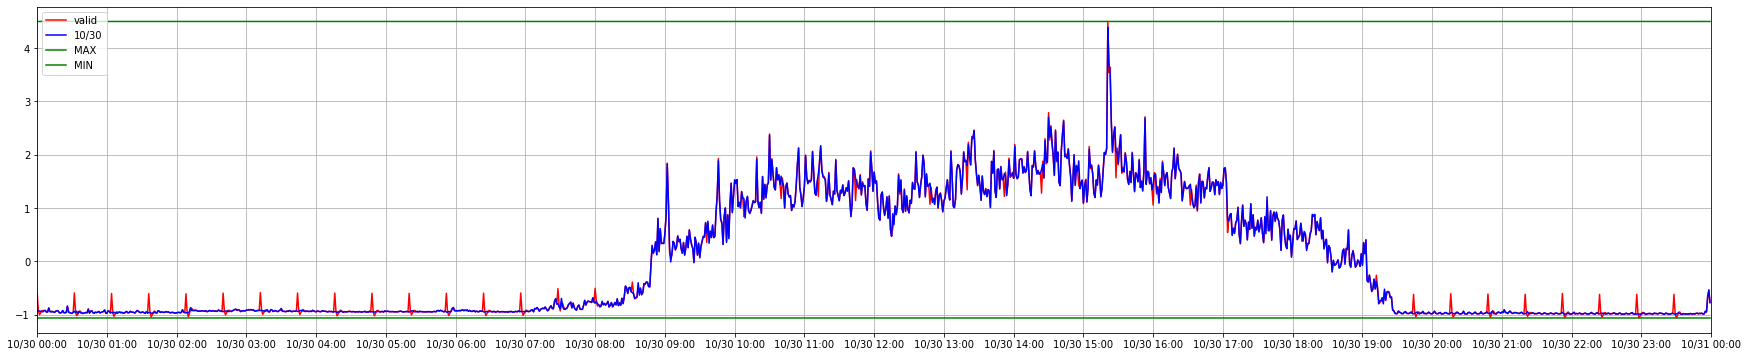

<Figure size 576x432 with 0 Axes>

In [0]:
visualize2(dat_1030_day, ["valid", "10/30", "MAX", "MIN"], ["red", "blue", "green", "green"], [pred_1d, dat_1030_body, max_1030, min_1030], dt.datetime(2019, 10, 30), dt.datetime(2019, 10, 31))

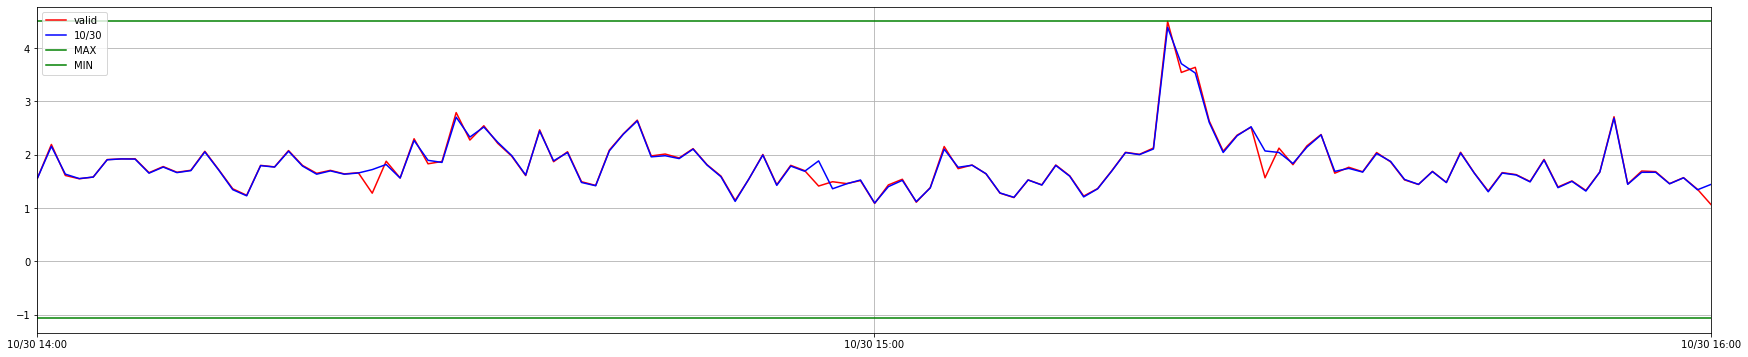

<Figure size 576x432 with 0 Axes>

In [0]:
visualize2(dat_1030_day, ["valid", "10/30", "MAX", "MIN"], ["red", "blue", "green", "green"], [pred_1d, dat_1030_body, max_1030, min_1030], dt.datetime(2019, 10, 30, 14, 00, 00), dt.datetime(2019, 10, 30, 16, 00, 00))

In [0]:
# 実データで予測値Maxより大きいもの
dat_graph[dat_1030_body > max_1030]

array([], shape=(0, 2), dtype=object)

In [0]:
# 実データで予測値Minより小さいもの
dat_graph[dat_1030_body < min_1030]

array([], shape=(0, 2), dtype=object)

# 分散による異常度のスコアリング

In [0]:
def normalize(dat):
    from sklearn.preprocessing import minmax_scale
    return minmax_scale(dat)

In [0]:
# 予測した値と実際の値との平均2乗誤差 Mean Squared Error
# 分散は 1.0 かな？
def calc_mse(predict_value, value, variance=1.0):
    mse_value = [(v - p_v)**2 / variance for v, p_v in zip(value, predict_value)]
    return np.array(mse_value)

## 学習(train:10/29)データの異常度

1.0


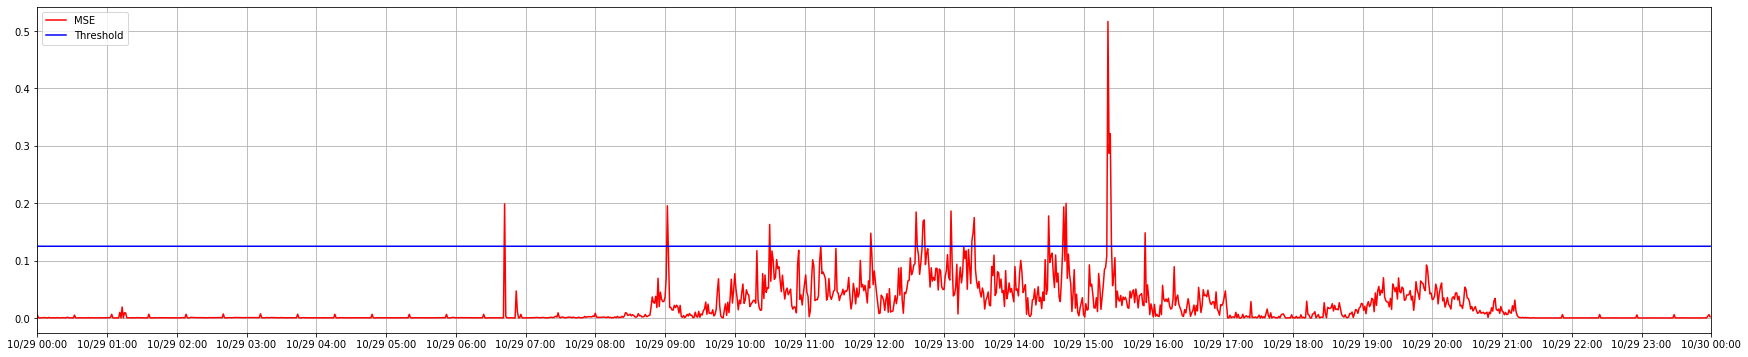

<Figure size 576x432 with 0 Axes>

In [0]:
d_pred = normalize(pred_1d)
d_body = normalize(dat_1029_body)
mse_dat = calc_mse(d_pred, d_body)

thresh_dat = [0.125 for _ in mse_dat]
print(np.max(d_pred))
visualize2(dat_1029_day, ['MSE', "Threshold"], ["red", "blue"], [mse_dat, thresh_dat], dt.datetime(2019, 10, 29), dt.datetime(2019, 10, 30))

In [0]:
diff = d_pred - d_body
diff_hist = np.histogram(diff)
diff_hist

(array([  2,  30, 113, 488, 420, 255, 117,  12,   2,   1]),
 array([-0.44711816, -0.33051931, -0.21392046, -0.09732161,  0.01927724,
         0.13587609,  0.25247494,  0.36907379,  0.48567264,  0.6022715 ,
         0.71887035]))

In [0]:
import numpy as np
import matplotlib.pyplot as plt

# ヒストグラムを出力
def visualize_hist(dat):
    fig, ax = plt.subplots(1, 1, figsize=(20, 4))
    fig = plt.figure(figsize=(12.0, 6.0))
    ax.grid(True)
    ax.hist(dat, bins=100)
    fig.show()

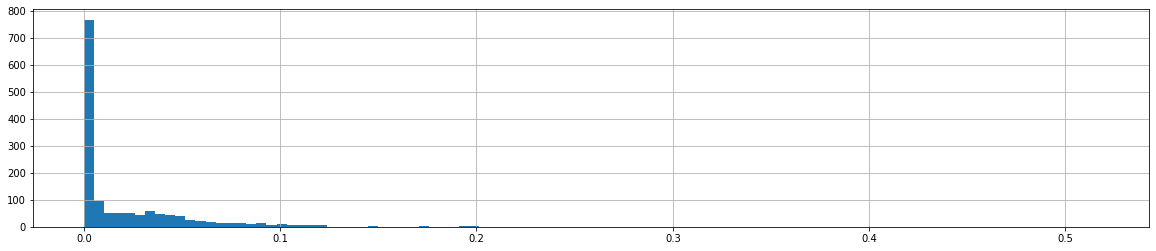

<Figure size 864x432 with 0 Axes>

In [0]:
visualize_hist(mse_dat)

In [0]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_hist_curve(dat, scale = 100):
    # ヒストグラムを出力
    fig, ax = plt.subplots(1, 1, figsize=(24, 8))
    fig = plt.figure(figsize=(12.0, 4.0))
    ax.grid(True)
    ax.hist(dat, bins=100)

    from scipy.stats import norm
    X = np.arange(-np.max(dat),np.max(dat),max(mse_dat)/scale)
    Y = norm.pdf(X,np.average(dat), np.std(dat))
    ax.plot(X,Y)
    fig.show()

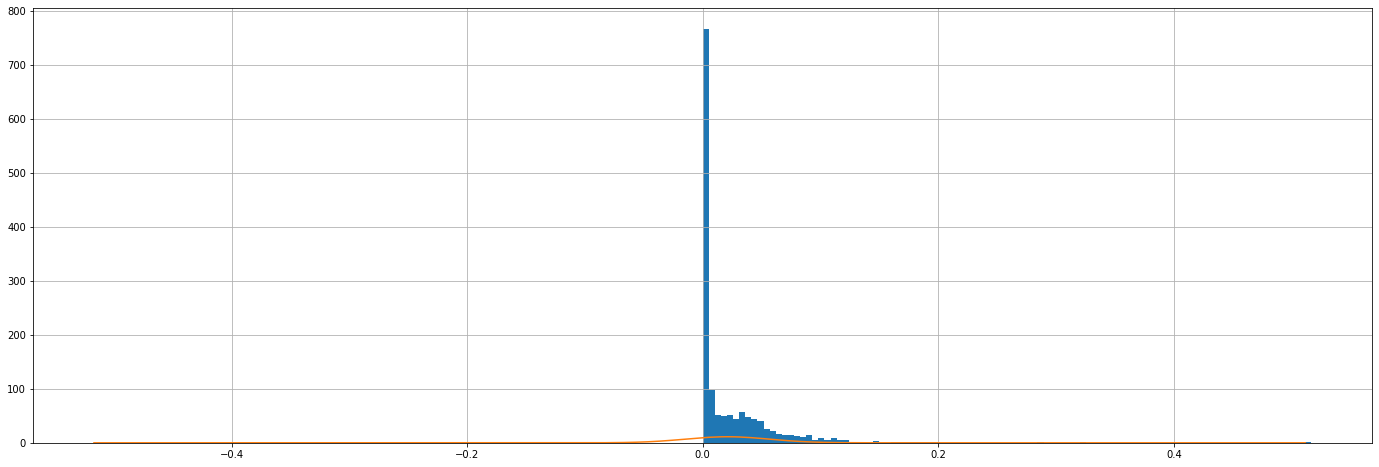

<Figure size 864x288 with 0 Axes>

In [0]:
visualize_hist_curve(mse_dat)

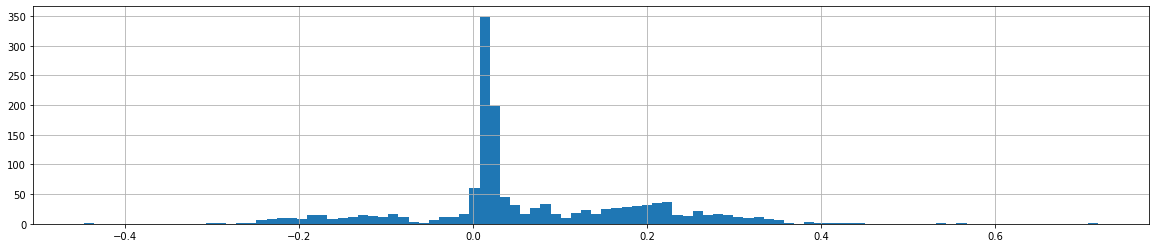

<Figure size 864x432 with 0 Axes>

In [0]:
visualize_hist(diff)

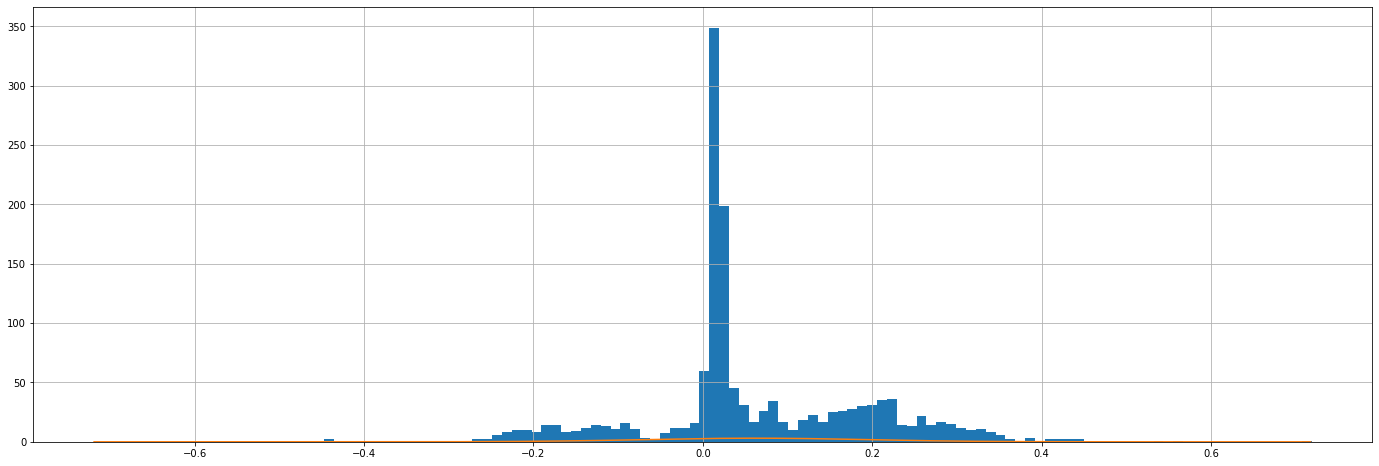

<Figure size 864x288 with 0 Axes>

In [0]:
visualize_hist_curve(diff, 100)

In [0]:
mse_dat[np.average(mse_dat) + 3*np.std(mse_dat) < mse_dat]

array([0.19894149, 0.19556633, 0.16300301, 0.1477295 , 0.18462214,
       0.16866277, 0.17090132, 0.18647394, 0.13470516, 0.14880035,
       0.17503997, 0.17785344, 0.19364235, 0.19991465, 0.51677458,
       0.28703695, 0.32109997, 0.13050092, 0.14843399])

In [0]:
np.average(mse_dat) + 3*np.std(mse_dat)

0.12760211030868227

## 訓練(valid:10/30)データの異常度


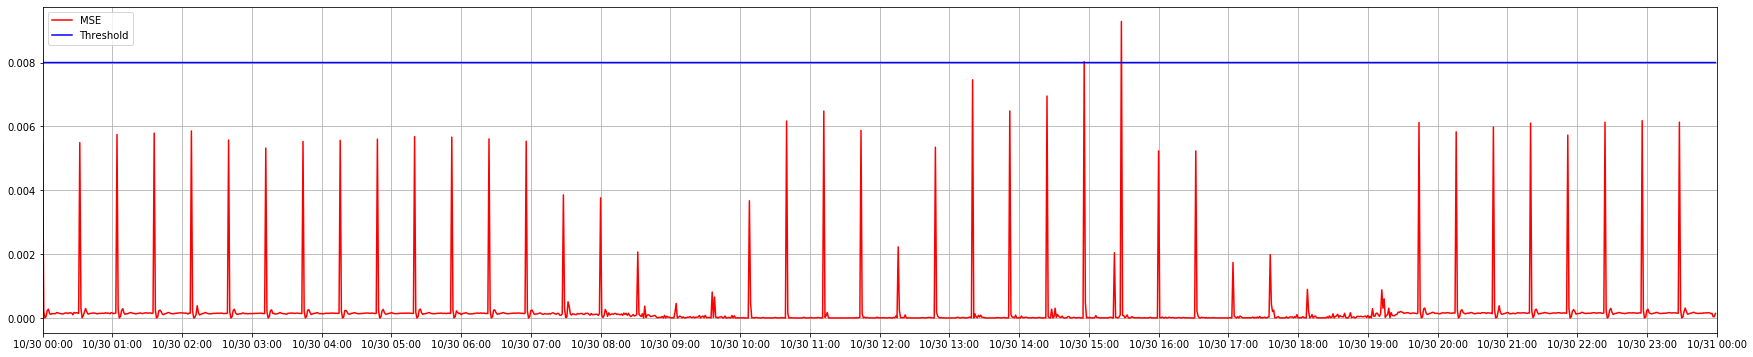

<Figure size 576x432 with 0 Axes>

In [0]:
d_pred = normalize(pred_1d)
d_body = normalize(dat_1030_body)
mse_dat = calc_mse(d_pred, d_body)

thresh_dat = [0.008 for _ in mse_dat]
visualize2(dat_1030_day, ['MSE', "Threshold"], ["red", "blue"], [mse_dat, thresh_dat], dt.datetime(2019, 10, 30), dt.datetime(2019, 10, 31))

In [0]:
counter = {}
for i in list(np.round(mse_dat, decimals=3)):
    if counter.get(i) is None:
        counter[i] = 1
    else:
        counter[i] += 1

In [0]:
pd.DataFrame(counter.items()).T

,0,1,2,3,4,5,6,7,8
0,0.005,0.0,0.006,0.004,0.001,0.002,0.007,0.008,0.009
1,6.000,1393.0,23.000,3.000,6.000,5.000,2.000,1.000,1.000


In [0]:
diff = d_pred - d_body
d_pred_hist = np.histogram(mse_dat)
d_pred_hist

(array([1399,    1,    4,    1,    2,    9,   20,    1,    2,    1]),
 array([0.        , 0.00092868, 0.00185737, 0.00278605, 0.00371474,
        0.00464342, 0.00557211, 0.00650079, 0.00742948, 0.00835816,
        0.00928685]))

In [0]:
diff_hist = np.histogram(diff)
diff_hist

(array([  6,   5,   4,   3,  13, 625, 758,   1,   1,  24]),
 array([-0.09636828, -0.07886979, -0.0613713 , -0.0438728 , -0.02637431,
        -0.00887582,  0.00862267,  0.02612116,  0.04361966,  0.06111815,
         0.07861664]))

In [0]:
np.max(mse_dat)

0.009286845527843228

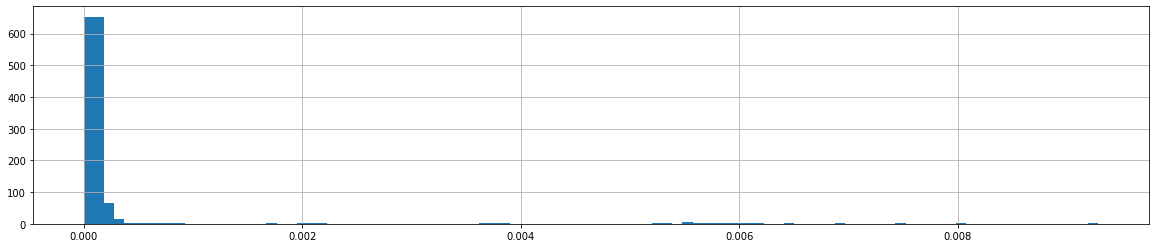

<Figure size 864x432 with 0 Axes>

In [0]:
visualize_hist(mse_dat)

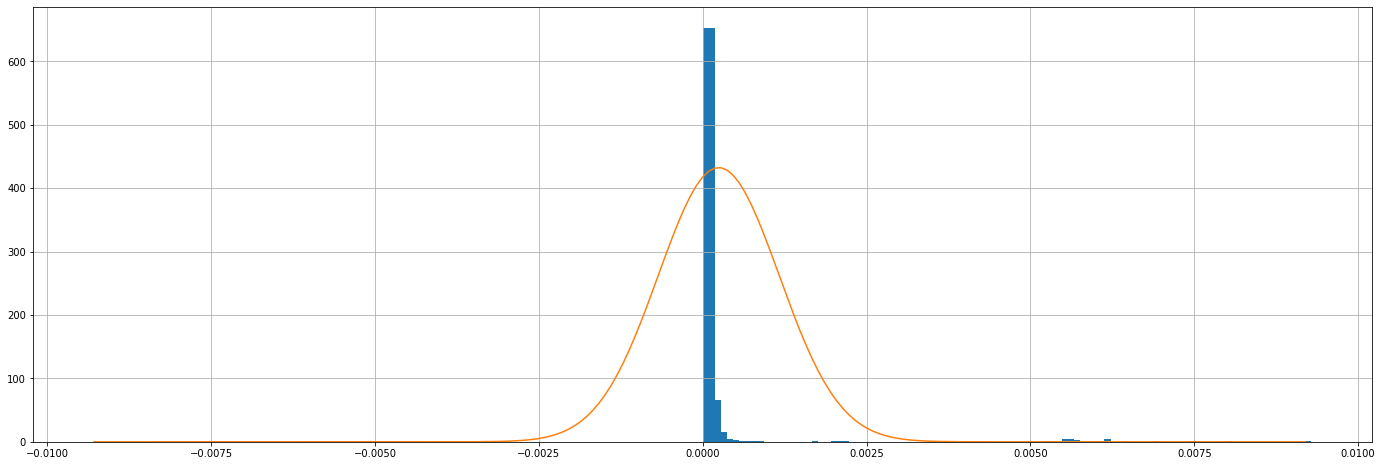

<Figure size 864x288 with 0 Axes>

In [0]:
visualize_hist_curve(mse_dat)

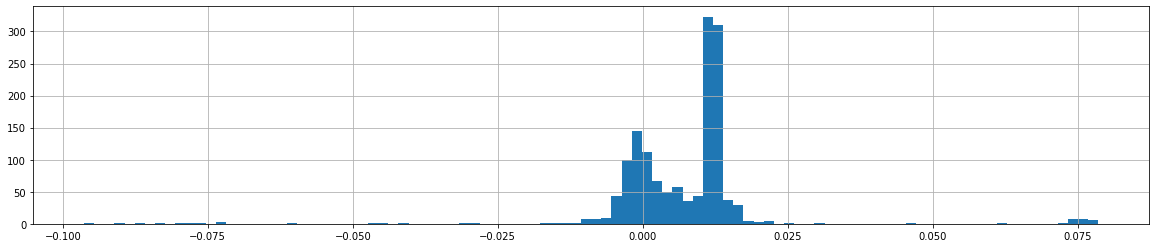

<Figure size 864x432 with 0 Axes>

In [0]:
visualize_hist(diff)

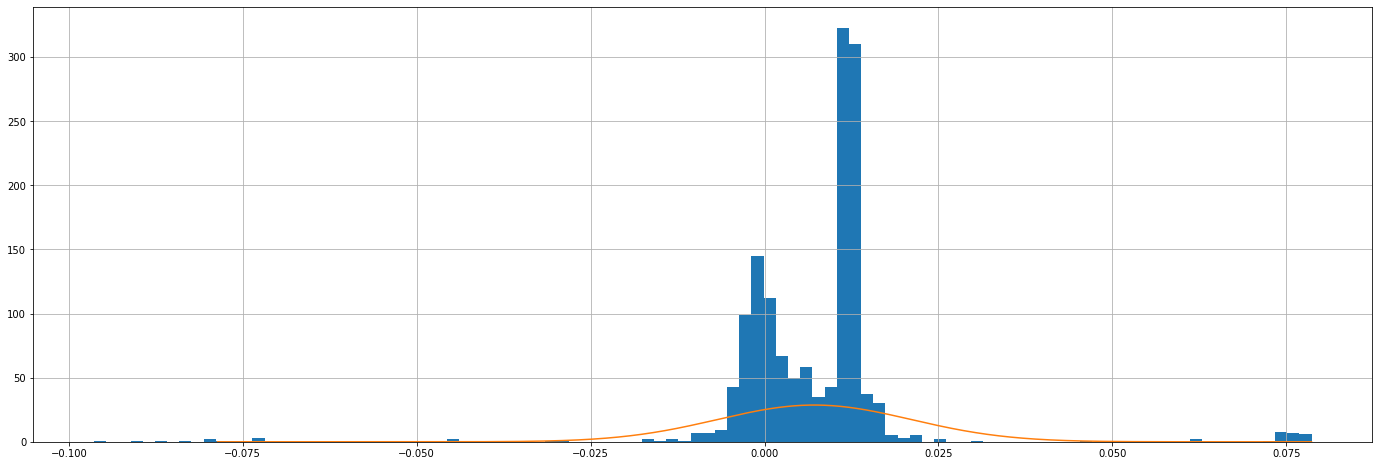

<Figure size 864x288 with 0 Axes>

In [0]:
visualize_hist_curve(diff, 100)

In [0]:
mse_dat[np.average(mse_dat) + 3*np.std(mse_dat) < mse_dat].shape

(36,)

In [0]:
np.average(mse_dat) + 3*np.std(mse_dat)

0.003012549600090784

In [0]:
diff[np.average(diff) + 3*np.std(mse_dat) < diff].shape, diff[diff < np.average(diff) - 3*np.std(mse_dat)].shape, 

((756,), (543,))

In [0]:
threshold_3s_top = np.average(diff) + 3*np.std(diff)
threshold_3s_bottom = np.average(diff) - 3*np.std(diff)

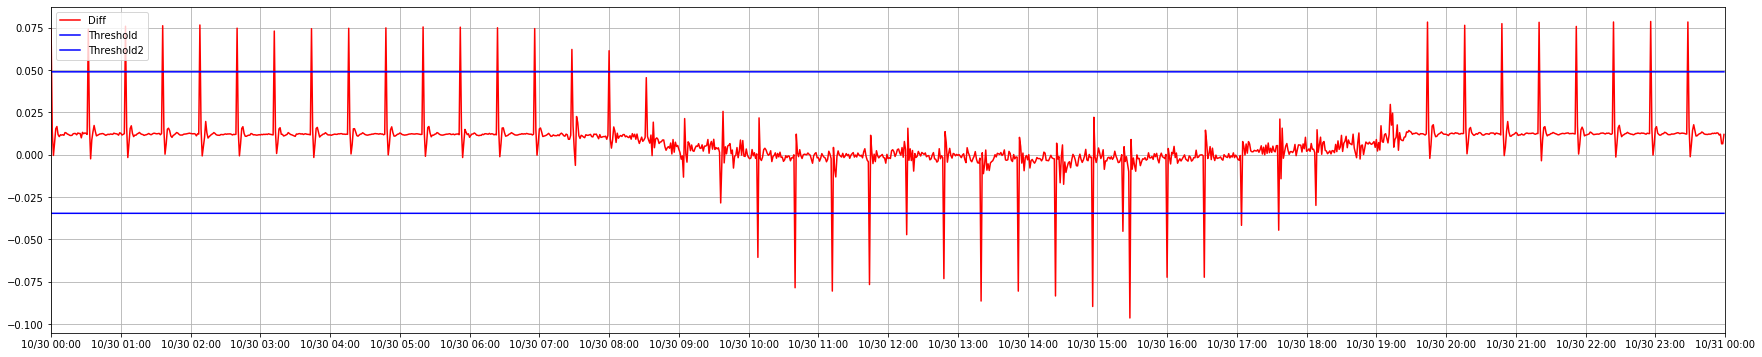

<Figure size 576x432 with 0 Axes>

In [0]:
visualize2(dat_1030_day, ['Diff', "Threshold", "Threshold2"], ["red", "blue", "blue"], [diff, [threshold_3s_top for _ in diff], [threshold_3s_bottom for _ in diff]], dt.datetime(2019, 10, 30), dt.datetime(2019, 10, 31))